## <strong> 7. NumPy 고급 기능 </strong>
+ 브로드캐스팅 (broadcasting)
+ 마스킹 (masking)
+ 팬시 인덱싱 (fancy indexing)

In [1]:
import numpy as np

### <strong> 브로드캐스팅 연산 </strong>
+ ```np.ones()```: 1로 이루어진 NumPy 배열 생성

In [2]:
# 1D + 스칼라
a = np.array([0, 1, 2])
print(a + 5)

[5 6 7]


In [5]:
# 1D + 2D 배열
a = np.ones((3,3))      # [+] 1로 이루어진 (3, 3)의 배열 생성
print(a, '\n')

b = np.arange(3)  # [+] [0, 1, 2]로 이루어진 정수 배열 생성
print(b, '\n')

print(a+b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[0 1 2] 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [4]:
# 두 배열 모두 브로드캐스팅이 적용되는 경우
a = np.arange(3)
a = a[:,np.newaxis]   # [+] 차원 추가: (3,) -> (3, 1)
print(a, '\n')

b = np.arange(3)
print(b, '\n')

print(a + b)

[[0]
 [1]
 [2]] 

[0 1 2] 

[[0 1 2]
 [1 2 3]
 [2 3 4]]


### <strong> 브로드캐스팅 규칙 </strong>

In [6]:
# 예제: 1D + 2D
a = np.ones((2, 3))
b = np.arange(3)

a+b

array([[1., 2., 3.],
       [1., 2., 3.]])

In [7]:
# 예제: 두 배열 모두 브로드캐스팅이 적용되는 경우
a = np.arange(3)
a = a.reshape((3, 1))
b = np.arange(3)

print(a)
print(b)

a+b

[[0]
 [1]
 [2]]
[0 1 2]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [8]:
# 예제: 브로드캐스팅이 불가능한 경우
a = np.ones((3, 2))
print(a, '\n')

b = np.arange(3)
print(b, '\n')

print(a + b)

[[1. 1.]
 [1. 1.]
 [1. 1.]] 

[0 1 2] 



ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### <strong> 비교 연산, 마스크, 불리언 연산 </strong>

In [9]:
# 배열의 비교 연산(마스킹)
x = np.array([1, 2, 3, 4, 5])

print(x < 3)
print(x >= 3)
print(x != 3)
print(x == 3)

[ True  True False False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


#### 예제: 시애틀 2014년 강수량

In [10]:
import pandas as pd  # 데이터 조작을 위한 라이브러리

df = pd.read_csv('data/seattle2014.csv')
prcp = df['PRCP'].values   # PRCP: Precipitation (강수량)
prcp = prcp / 254.0  # 인치(inch) 단위로 변환
prcp[:10]

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134])

In [21]:
# [+] 비가 온 날은 며칠일까?
np.sum(prcp > 0) 

150

In [22]:
# [+] 비가 온 날의 평균 강수량은?
np.mean(prcp > 0)


0.410958904109589

In [23]:
# [+] 0.5인치 이상 비가 온 날은 며칠?
np.sum(prcp >= 0.5)

39

시각화 라이브러리 (seaborn) 설치

In [24]:
!pip install seaborn

In [25]:
# 시각화 설정 코드
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
%config InlineBackend.figure_format = 'svg'

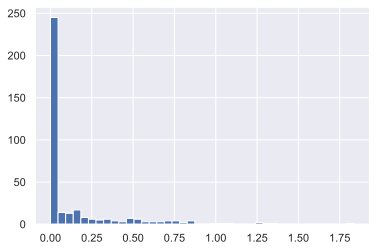

In [26]:
# 강수량 히스토그램 시각화
plt.hist(prcp, 40);

In [27]:
# 다차원 배열의 비교 연산
np.random.seed(0)
x = np.random.randint(10, size=(3, 4))
print(x, '\n')

print(x < 6)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]] 

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


In [28]:
# Boolean 배열 연산
print(np.count_nonzero(x < 6))  # [+] 6보다 작은가? np.count_nonzero()
print(np.sum(x < 6))            # [+] 6보다 작은가? np.sum()
print(np.any(x > 8))            # [+] 8보다 큰 값이 있는가?
print(np.all(x > 1))            # [+] 모든 값이 1보다 큰가? 

8
8
True
False


In [29]:
# Boolean 배열을 이용한 데이터 선택
print(x, '\n')
print(x < 5, '\n')

print(x[x < 5])

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]] 

[[False  True  True  True]
 [False False  True False]
 [ True  True False False]] 

[0 3 3 3 2 4]


### <strong> 팬시 인덱싱(fancy indexing) </strong>

In [30]:
# 난수 배열 생성
np.random.seed(1)
x = np.random.randint(100, size=10)
x

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

In [31]:
# 기본 문법: 2, 4, 6번 원소 선택하기
a = x[2]
b = x[4]
c = x[6]

print([a, b, c])

[72, 75, 79]


In [32]:
# 팬시 인덱싱: 2, 4, 6번 원소 선택하기
ind = [2,4,6]  # [+] 인덱스 배열 생성
print(x[ind])      # [+] 인덱스 배열을 이용한 값 선택

[72 75 79]


In [33]:
# 팬시 인덱싱: 다차원 배열
np.random.seed(2)
x = np.random.randint(10, size=(3, 5))
print(x, '\n')

row = [0, 1, 2]
col = [2, 1, 4]

print(x[row, col])

[[8 8 6 2 8]
 [7 2 1 5 4]
 [4 5 7 3 6]] 

[6 2 6]


In [34]:
# 팬시 인덱싱: 다차원 배열 + 브로드캐스팅
row = np.array([0, 1, 2])
col = np.array([2, 1, 4])

x[row[:, np.newaxis], col]

array([[6, 8, 8],
       [1, 2, 4],
       [7, 5, 6]])

In [35]:
# 결합 인덱싱
x = np.arange(1, 13).reshape(3, 4)
print(x, '\n')

ind = [2, 0, 1]

print(x[2, ind], '\n')
print(x[1:, [2, 0, 1]])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[11  9 10] 

[[ 7  5  6]
 [11  9 10]]


#### 예제: 팬시 인덱싱을 이용한 임의의 점 집합 선택하기
+ ```np.random.seed()```: 난수 생성을 위한 초기상태(seed)를 관리 (전역적 상태)
+ ```np.random.RandomState()```: seed를 별도 객체에서 관리 (지역적 상태) ${\rightarrow}$ 독립적인 난수 생성기를 여러 개 생성 가능

In [36]:
mean = [0, 0]     # 평균
cov = [[1, 2],    # 공분산
      [2, 5]]

rand = np.random.RandomState(1)  # RandomState: 시드를 별도 객체에서 관리
x = rand.multivariate_normal(mean, cov, 100)  # 정규분포 다변량 데이터 생성
print(x[:10])
print(x.shape)

[[-1.26659039e+00 -3.71998007e+00]
 [ 8.98574387e-01  1.00797760e+00]
 [ 8.12283322e-02 -2.29506499e+00]
 [-1.32069461e+00 -4.01236325e+00]
 [-1.99323780e-01 -7.51126722e-01]
 [-5.62429879e-01 -3.58770608e+00]
 [ 4.44845894e-01  6.58255553e-01]
 [-6.26556217e-01 -2.70315425e+00]
 [ 4.95244764e-01  2.45439522e-01]
 [-2.62034143e-01 -1.77174030e-03]]
(100, 2)


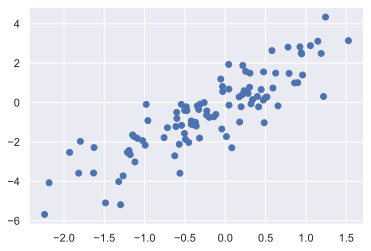

In [37]:
# 산포도 출력: scatter(x, y)
plt.scatter(x[:, 0], x[:, 1]);

In [38]:
# 20개의 점을 무작위 추출(random sampling) -> 인덱스 값을 리턴
ind = np.random.choice(x.shape[0], 20, replace=False)
print(ind)

[79 94 93 14 87 30 77  2 25  0 35 74 28 24  3 78 98 29  7 13]


In [39]:
# 선택된 점 집합 출력
selected = x[ind]      # 팬시 인덱싱
print(selected)
print(selected.shape)

[[ 0.41329378 -0.21668487]
 [-0.2313217  -0.63759661]
 [-0.61204956 -1.21704639]
 [ 0.04453806  0.68157702]
 [ 0.04626182 -0.13327485]
 [ 0.21752093  1.8812367 ]
 [-0.36943983 -1.00031388]
 [ 0.08122833 -2.29506499]
 [-0.14252103 -0.7253487 ]
 [-1.26659039 -3.71998007]
 [ 1.52723792  3.14104857]
 [-0.47599808 -0.4103727 ]
 [-1.13143694 -1.72371279]
 [-0.3472058  -0.17017312]
 [-1.32069461 -4.01236325]
 [ 0.17161857  0.28546056]
 [-0.71730549 -1.27681847]
 [-0.60257714 -0.49668002]
 [-0.62655622 -2.70315425]
 [ 0.47163922  0.12576827]]
(20, 2)


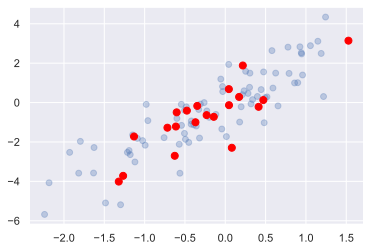

In [44]:
# 선택된 점 집합 시각화
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)    # 원본 점 집합
plt.scatter(selected[:, 0], selected[:, 1], # 선택된 점 집합
            facecolor='red', s=50);